### Imports

In [1]:
import json
import requests
import numpy as np
import pandas as pd

from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm_notebook as tqdm

### Constants

In [2]:
RAW_DATA = '../data/raw_submissions_data_2000.json'
OUT_DIR = '../data/images'
IMG_SIZE = (256, 256)

### Utilities

In [3]:
def download_image_from_url(url, submission_id, check_size=False):
    try:
        # Request URL
        response = requests.get(url)

        # Download Image
        image = Image.open(BytesIO(response.content))

        # Check Deleted Reddit Image
        if check_size and image.size == (130, 60):
            return

        # Resize Image
        image = image.resize(IMG_SIZE)

        # Save Image
        outpath = '{}/{}.png'.format(OUT_DIR, submission_id)
        image.save(outpath, 'PNG')
    except Exception as e:
         print('Failed for url {} - {}'.format(url, e))

def download_submission_image(submission, verbose=True):
    url = submission['url']
    
    # Direct image links
    if 'i.redd.it' in url or 'i.imgur' in url:
        download_image_from_url(submission['url'], submission['id'], check_size=True)
        
    # Reddit Gallery
    elif 'reddit.com/gallery/' in url:
        pass
        
    # Imagur
    elif 'imgur' in url :
        # Gallery posts and albums
        if '/a/' in url or '/gallery/' in url:
            pass
        # Single images
        else:
            url = url.split('//', 1)[1]
            url = 'https://i.{}.png'.format(url)
            download_image_from_url(url, submission['id'])
                    
    # Unknown
    else:
        print('Failed for url {} - Uknown url')

### Load Raw Data

In [4]:
with open (RAW_DATA) as j:
    raw_data = json.load(j)

### Download Images

In [ ]:
for submission in tqdm(raw_data):
    download_submission_image(submission)

  0%|          | 0/2019 [00:00<?, ?it/s]

In [7]:
sizes = pd.Series(sizes, name='sizes').to_frame()
sizes.sizes.value_counts()

(130, 60)       483
(3024, 4032)    291
(2316, 3088)    124
(2320, 3088)     88
(2448, 3264)     69
               ... 
(1520, 2048)      1
(1184, 1776)      1
(961, 1280)       1
(1559, 2264)      1
(1838, 2448)      1
Name: sizes, Length: 443, dtype: int64

In [8]:
sizes['aspects'] = sizes.sizes.apply(lambda s: None if s is None else s[0] / s[1])
sizes.aspects.value_counts()

0.750000    756
2.166667    483
1.333333     90
0.562500     88
0.751295     88
           ... 
0.749520      1
0.952558      1
1.742397      1
0.463281      1
1.332639      1
Name: aspects, Length: 322, dtype: int64

<AxesSubplot:>

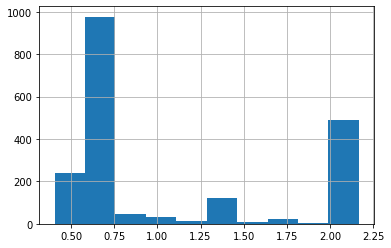

In [9]:
sizes.aspects.hist()

<AxesSubplot:>

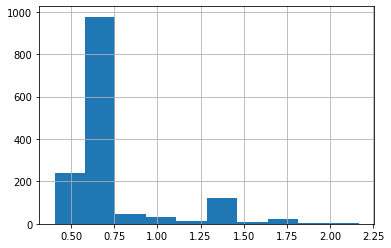

In [10]:
sizes_no_deleted = sizes[sizes.sizes != (130, 60)]
sizes_no_deleted.aspects.hist()